Proyecto Modelación Estadísitica 2


Universidad de Valparaíso

Ingeniería Civil Matemática

In [ ]:
# Conjuntos de datos almacenados en Toolbox
from sklearn import datasets  
# Separación del conjunto de datos en conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split 
# Método para reescalar los datos
from sklearn.preprocessing import StandardScaler
# Paquete numérico para el procesamiento de datos
import numpy as np
# Paquete para realizar los gráficos 
import matplotlib.pyplot as plt
# Paquete para el manejo de datos
import pandas as pd
import seaborn as sns
import statistics as stat

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
#Cargamos los archivos desde el Drivefrom google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

# Carga del conjunto de datos
url="/content/drive/MyDrive/heart.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:, [3, 9]].values




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este conjunto de datos contiene datos médicos, sobre pacientes ingresados en un hospital. Se tienen 1177 pacientes observados y 50 variables a considerar las cuales se muestran en la siguiente tabla.

In [ ]:
dataset

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


Calculamos la media de los datos

In [ ]:
np.mean(dataset)

group                            1.299065
ID                          150778.120646
outcome                          0.135204
age                             74.055225
gendera                          1.525064
BMI                             30.188278
hypertensive                     0.717927
atrialfibrillation               0.451147
CHD with no MI                   0.085811
diabetes                         0.421410
deficiencyanemias                0.338997
depression                       0.118946
Hyperlipemia                     0.379779
Renal failure                    0.365336
COPD                             0.075616
heart rate                      84.575848
Systolic blood pressure        117.995035
Diastolic blood pressure        59.534497
Respiratory rate                20.801511
temperature                     36.677286
SP O2                           96.272900
Urine output                  1899.276512
hematocrit                      31.914014
RBC                              3

In [ ]:
X

array([[72,  1],
       [75,  0],
       [83,  0],
       ...,
       [85,  1],
       [79,  1],
       [47,  1]])

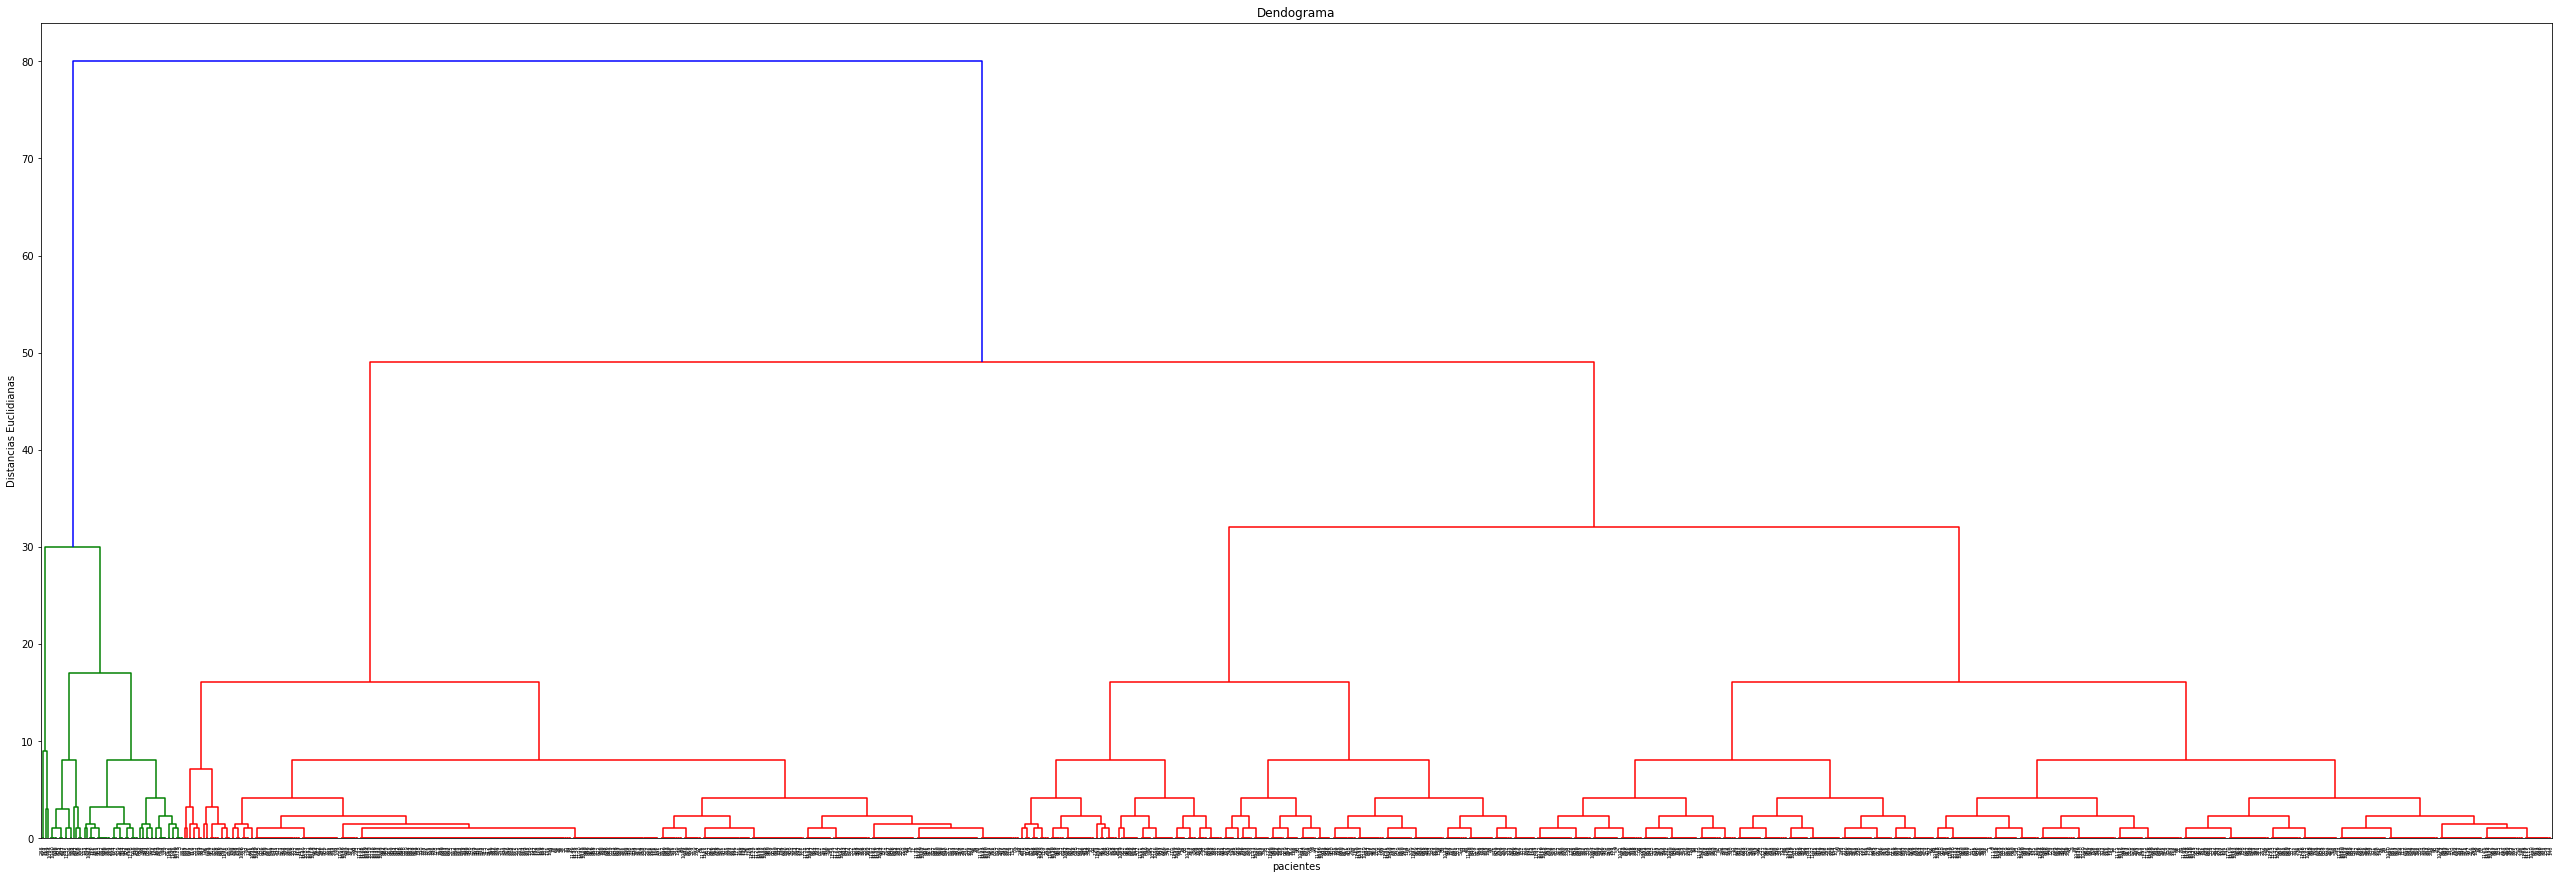

In [ ]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(45, 15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))

plt.title('Dendograma')
plt.xlabel('pacientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [ ]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

Vamos a distinguir 2 clustres, en base a la edad y si poseen diabetes o no, ie que nuestra variable respuesta sea diabetes


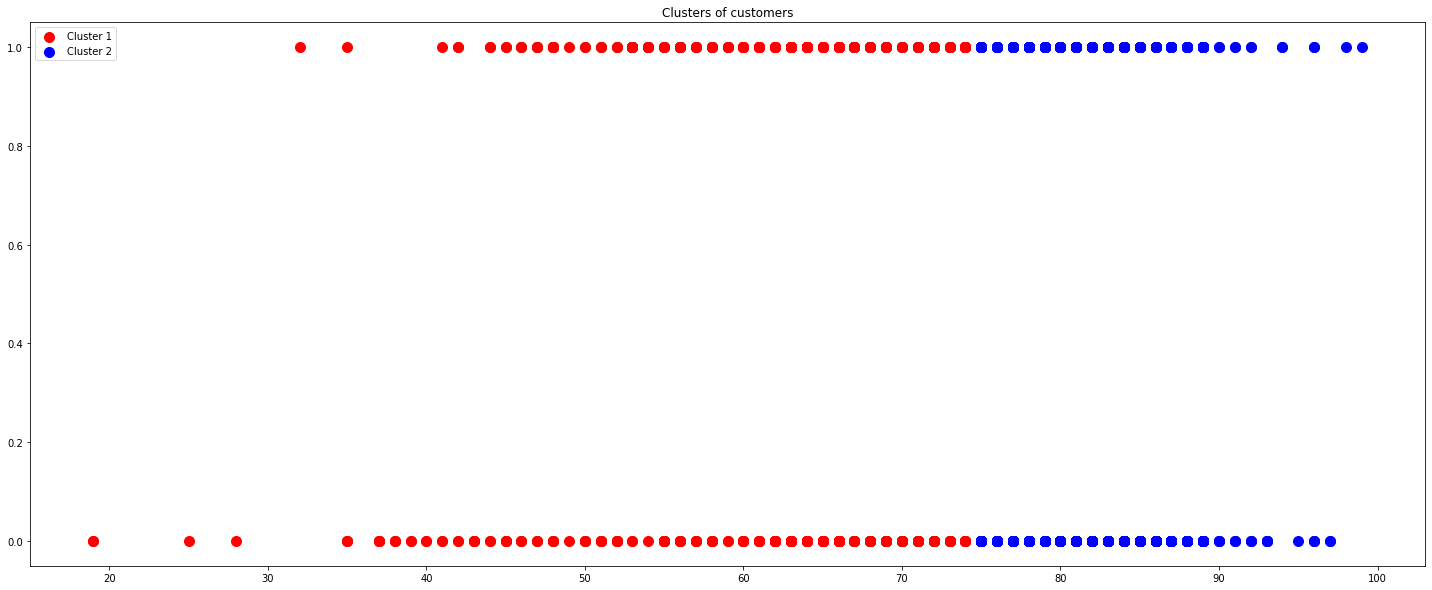

In [ ]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Ahora hagamos una clasificación lda

In [ ]:
df = pd.read_csv(url)
df1 = df[['group','age','gendera','hypertensive','atrialfibrillation',
          'diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure']].copy()

In [ ]:
y = (df1['age']>65).astype('uint8')
X = df1.values[:,:-1]
sum(y)

879

In [ ]:
879/1177

0.7468139337298216

In [ ]:
df1['Class']=y
df1 = df1.drop(columns='age')

In [ ]:
#sns.pairplot(df, hue='Class')

In [ ]:
X_entrenamiento, 
X_test, 
y_entrenamiento, 
y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

In [ ]:
sc = StandardScaler()
# Los datos son reescalado con respecto a los datos de entrenamiento
sc.fit(X_entrenamiento) 
# Tanto el conjunto de entrenamiento como el de test son reescalados
Z_entrenamiento = sc.transform(X_entrenamiento)
Z_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(solver="svd")
y_train = lda.fit(Z_entrenamiento, y_entrenamiento).predict(Z_entrenamiento)
confusion_matrix(y_train, y_entrenamiento)

ValueError: ignored

In [ ]:
y_pred = lda.predict(Z_test)
confusion_matrix(y_test, y_pred)

NotFittedError: ignored

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 

NameError: ignored